# Assignment 10

*(Due Saturday, November 30, 2019 at noon.)*

In [2]:
#### LOAD PACKAGES 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

#Graphics settings
%matplotlib inline
sns.set()

In [71]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


1) Create a linear regression model to predict `tips.tip` from the other variables in the `tips` dataset. Print the model's `summary()`.



**Hints:**
1. You'll need to create dummy variables for `Day`, if you use it. `sex`, `time` and `smoker` can just be converted to integer (0 or 1) fields.
2. Try creating a scatterplot matrix (see Seaborn's [`.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function) to help decide which variables are likely to be useful.

In [72]:
#Creating dummy variables for each field 
tips_new = pd.get_dummies(tips, columns=['day'])
tips_new.head()

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,0,0,1


In [73]:
def sex_to_numeric(x):
    if x=='Male':
        return 1
    if x=='Female':
        return 0

In [74]:
tips_new['sex_num'] = tips_new['sex'].apply(sex_to_numeric)
tips_new

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun,sex_num
0,16.99,1.01,Female,No,Dinner,2,0,0,0,1,0
1,10.34,1.66,Male,No,Dinner,3,0,0,0,1,1
2,21.01,3.50,Male,No,Dinner,3,0,0,0,1,1
3,23.68,3.31,Male,No,Dinner,2,0,0,0,1,1
4,24.59,3.61,Female,No,Dinner,4,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Dinner,3,0,0,1,0,1
240,27.18,2.00,Female,Yes,Dinner,2,0,0,1,0,0
241,22.67,2.00,Male,Yes,Dinner,2,0,0,1,0,1
242,17.82,1.75,Male,No,Dinner,2,0,0,1,0,1


In [75]:
def time_to_numeric(x):
    if x=='Dinner':
        return 2
    if x=='Lunch':
        return 1

In [76]:
tips_new['time_num'] = tips_new['time'].apply(time_to_numeric)
tips_new

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun,sex_num,time_num
0,16.99,1.01,Female,No,Dinner,2,0,0,0,1,0,2
1,10.34,1.66,Male,No,Dinner,3,0,0,0,1,1,2
2,21.01,3.50,Male,No,Dinner,3,0,0,0,1,1,2
3,23.68,3.31,Male,No,Dinner,2,0,0,0,1,1,2
4,24.59,3.61,Female,No,Dinner,4,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Dinner,3,0,0,1,0,1,2
240,27.18,2.00,Female,Yes,Dinner,2,0,0,1,0,0,2
241,22.67,2.00,Male,Yes,Dinner,2,0,0,1,0,1,2
242,17.82,1.75,Male,No,Dinner,2,0,0,1,0,1,2


In [77]:
def smoker_to_numeric(x):
    if x=='Yes':
        return 1
    if x=='No':
        return 0

In [81]:
tips_new['smoker_num'] = tips_new['smoker'].apply(smoker_to_numeric)
tips_new.head()

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun,sex_num,time_num,smoker_num
0,16.99,1.01,Female,No,Dinner,2,0,0,0,1,0,2,0
1,10.34,1.66,Male,No,Dinner,3,0,0,0,1,1,2,0
2,21.01,3.50,Male,No,Dinner,3,0,0,0,1,1,2,0
3,23.68,3.31,Male,No,Dinner,2,0,0,0,1,1,2,0
4,24.59,3.61,Female,No,Dinner,4,0,0,0,1,0,2,0


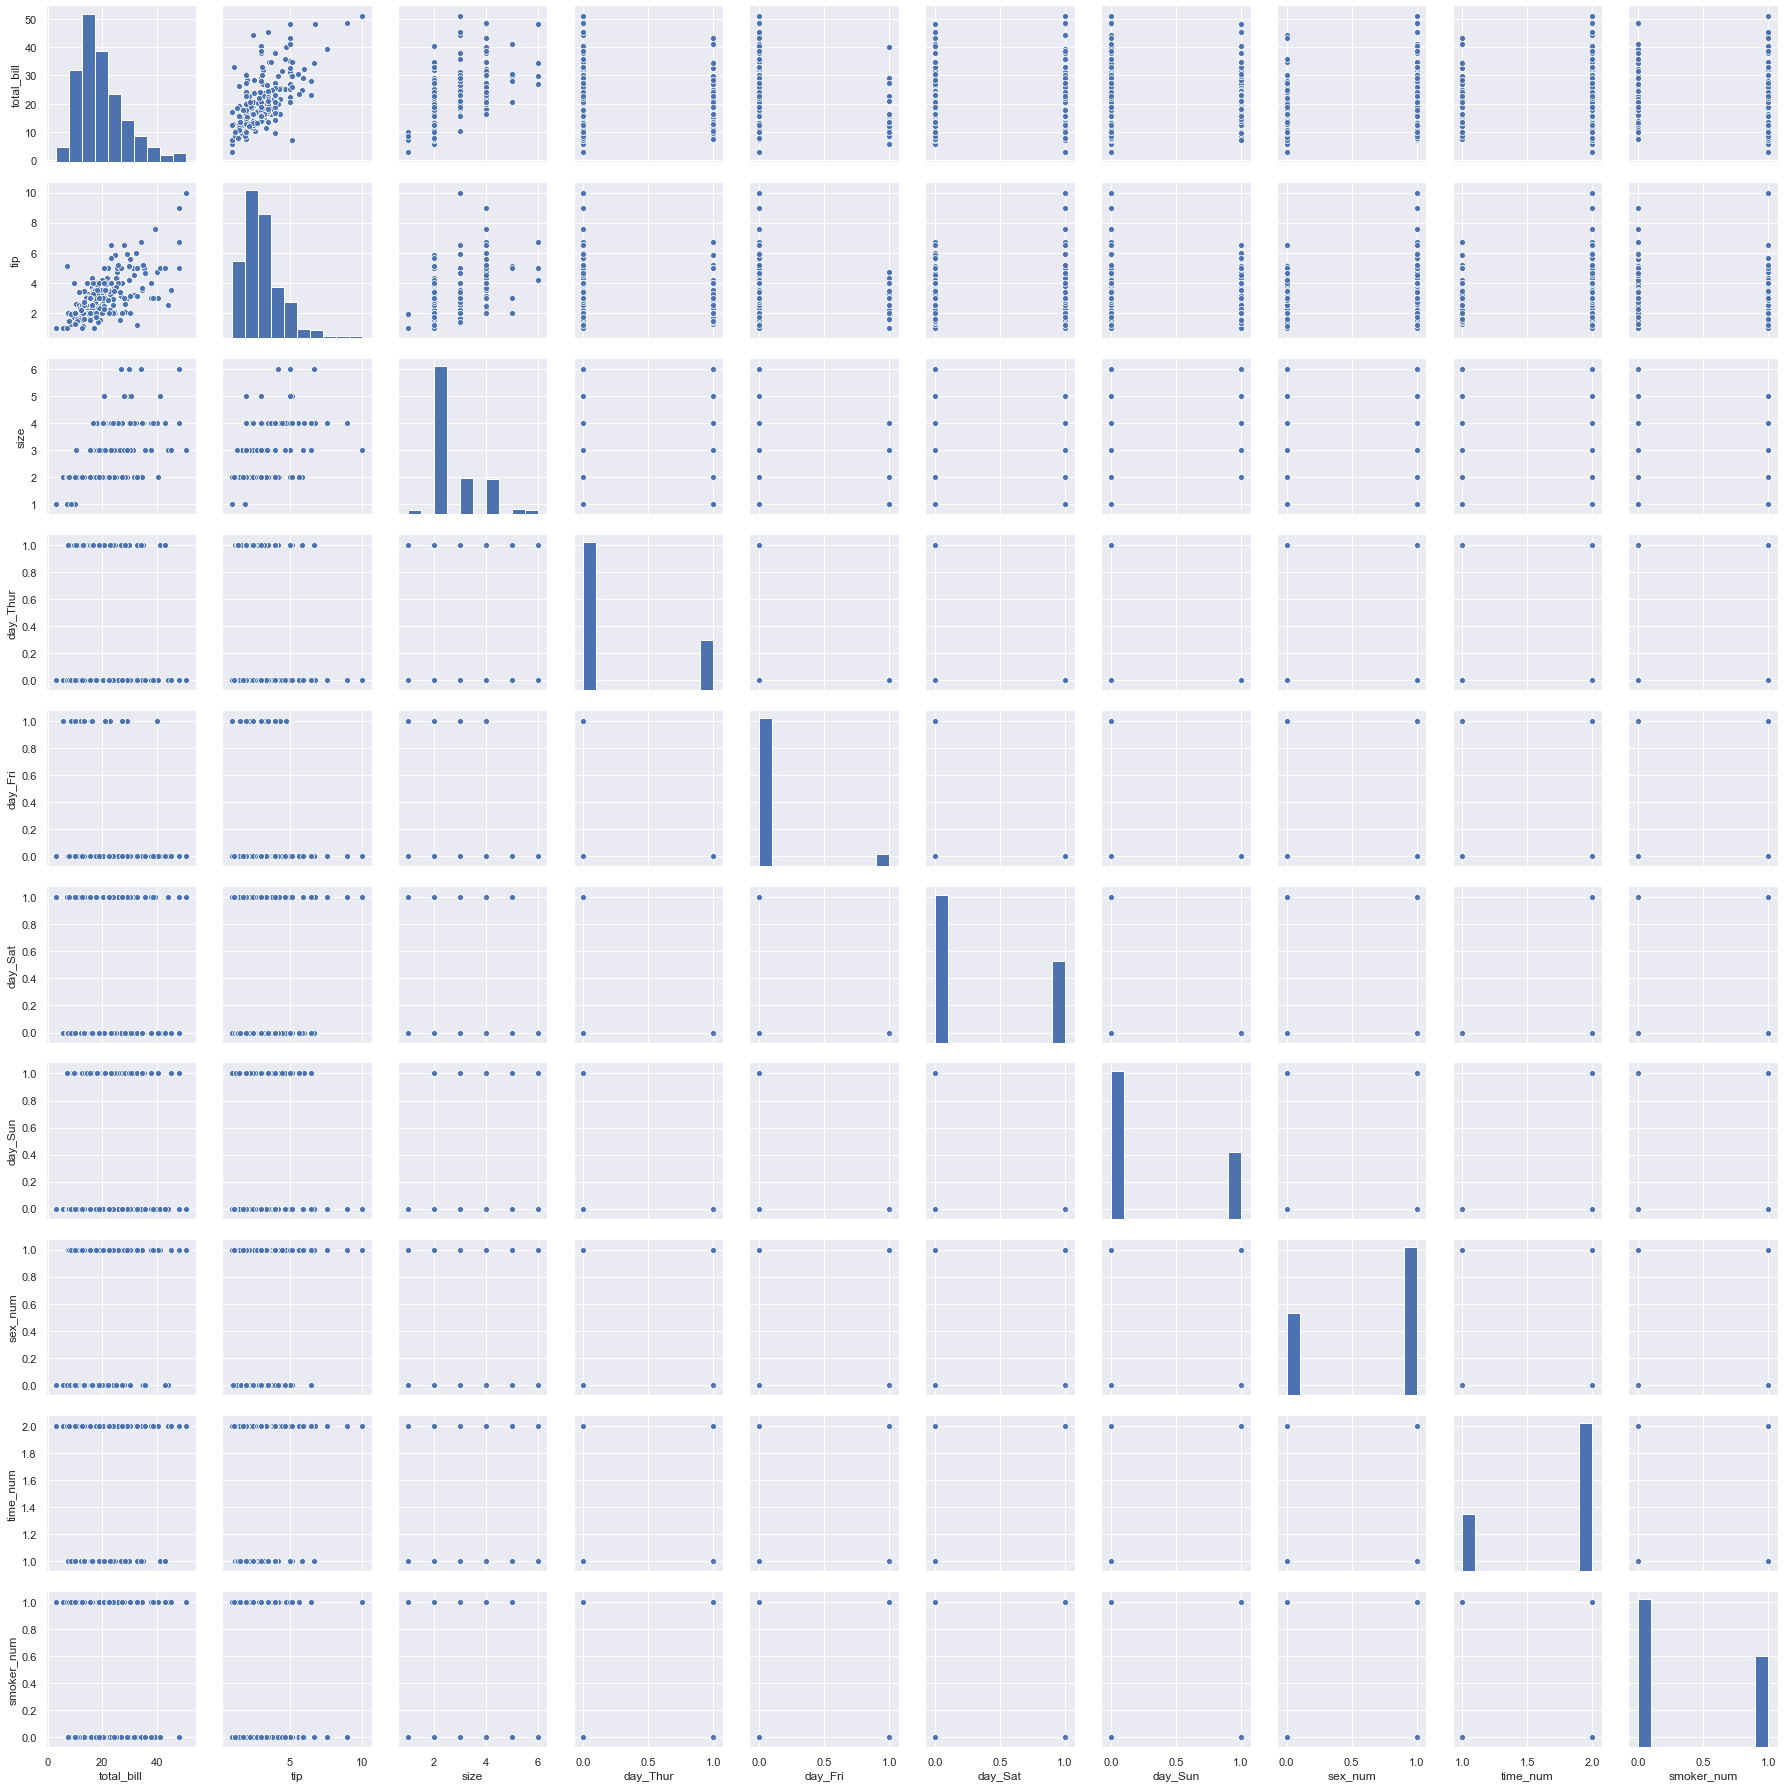

In [86]:
sns.pairplot(tips_new)
plt.show()

In [99]:
x = sm.add_constant(tips_new[['total_bill','size']])
y = tips_new.tip

lm = sm.OLS(y, x.astype(float)).fit()

# Residual Sum of Squares
RSS = sum(lm.resid ** 2)

# Total Sum of Squares
TSS = sum((tips_new.tip - np.mean(tips_new.tip)) ** 2)
R2 = 1 - (RSS/TSS)

#print('RSS: {}; TSS: {}; R-squared: {}'.format(RSS, TSS, R2))

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           9.67e-34
Time:                        17:53:02   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.001       0.288       1.050
total_bill     0.0927      0.009     10.172      0.000       0.075       0.111
size           0.1926      0.085      2.258      0.025       0.025       0.361
==============================================================================
Omnibus:                       24.753   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.169
Skew:                           0.545   Prob(JB):                     9.43e-11
Kurtosis:                       4.831   Cond. No.                         67.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2) Provide a linear function like this one from the class notes:  
    
**Box(Rate, User) = -229.0106 + 54.9285Rate + .4472User**

**tips(total_bill, size) = 0.6689 + 0.0927total_bill + 0.1926size**

In [100]:
#p-value
print(lm.pvalues)
print()

const         6.498061e-04
total_bill    1.880917e-20
size          2.487245e-02
dtype: float64



In [101]:
#R-squared
print("R-squared: %2.2f%%" % (lm.rsquared*100))
print("Adjusted R-squared: %2.2f%%" % (lm.rsquared_adj * 100))

R-squared: 46.79%
Adjusted R-squared: 46.35%


In [102]:
#Predictions and Residuals 
dir(lm)
print("All predictions:", lm.predict())

predict = lm.get_prediction((1, 10, 400))
print()
print("95% confidence interval:", predict.conf_int(alpha=.05))

predict.summary_frame()

All predictions: [2.62933992 2.20539403 3.19464533 3.24959215 3.71915687 3.78405621
 1.86723629 3.93147041 2.44854892 2.42444345 2.0063063  4.70840818
 2.48377998 3.14804272 2.42907911 3.05489414 2.20446689 2.75703838
 2.82008345 3.16126853 2.71556333 2.93529393 2.51622965 5.09409566
 2.89171867 3.09056045 2.29371764 2.23067257 3.06601974 2.8759574
 1.9395527  3.14062565 2.45040318 3.35757486 2.70258346 3.47742101
 2.75889265 2.81637492 2.97955039 4.14588417 2.73386005 2.67291519
 2.34656425 1.95160543 4.25782136 2.74986726 3.11515781 4.44324803
 3.89370389 2.72668893 2.21676557 2.00816057 4.66668717 1.9757109
 3.80908881 2.86112326 4.96336985 3.50269956 2.09623824 5.91460869
 2.93529393 2.33451151 2.0758413  3.13506285 2.87756572 3.10842193
 2.57927472 1.14617248 2.92973113 2.44576752 2.16855464 2.82935478
 3.54442056 3.39793348 2.41980778 2.0285575  2.71556333 3.96113868
 3.16429588 2.65715392 2.8564876  2.59874452 1.79516584 4.08401218
 2.53569945 4.66854144 2.26219511 2.74894013 3.

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,78.635196,33.960097,11.738689,145.531703,11.708904,145.561488


**Could only calculate residuals with `total_bill` and `size` in the model**

3) Provide scatterplots of residuals against each predictor variable and the predicted values.

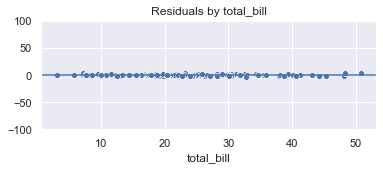

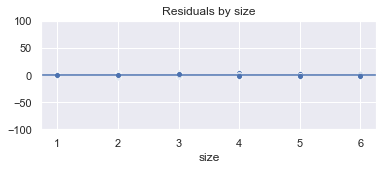

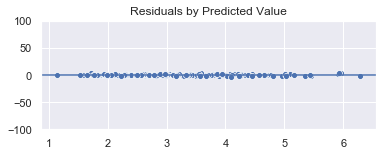

-1.9456203497119547e-15


In [103]:
for x in ('total_bill', 'size'):
    plt.figure(figsize=(6,2))
    sns.scatterplot(tips_new[x], lm.resid)
    plt.title("Residuals by %s" % x)
    plt.ylim(-100, 100)
    #Put a horizontal line through the mean of the predictions.
    plt.axhline(np.mean(lm.resid))
    plt.show()

plt.figure(figsize=(6,2))
sns.scatterplot(lm.predict(), lm.resid)
plt.title("Residuals by Predicted Value")
plt.ylim(-100, 100)
plt.axhline(np.mean(lm.resid))
plt.show()

print(np.mean(lm.resid))

4) Does your model meet the four assumptions expected of a linear model? Explain:

**Assumptions**

Residuals should:
1. have a mean close to zero across the distribution;

`Yes, the residuals have means close to 0 across their distributions.`

2. have constant variance (the vertical spread of the points remains approximately constant across the graph);

`Yes, the vertical spread of the points for all residuals is fairly constant across the graph - no points are significantly higher or lower than the others.`

3. have an approximately normal distribution--points tend to be closer to zero on the y axis, with gradually fewer appearing farther away;

`Yes, all points are close to 0 on the y-axis for all residuals.`

4. appear independent of one another--they seem to be distributed randomly. You shouldn't see a relationship between your input variable(s) and the residuals.

`Yes, there does not appear to be a relationship between the input variables and residuals. The graphs do not indicate a positive or negative relationship between the input variables and residuals.`